In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np

# Get last artifact version, date and number of releases

In [8]:
df = pd.read_csv('../data/MDG_release_2018.csv')
print(df.shape)

dictData = {}
for index, row in df.iterrows():
    dateSplit = row[2].split("T")
    if(len(dateSplit[0].split("-")) < 3):
        break
    date = datetime.strptime(dateSplit[0], "%Y-%m-%d")
    splitedName = row[0].split(":")
    artifact = splitedName[0]+":"+splitedName[1]
    version = splitedName[2]
    try:
        dictData[artifact][2] = dictData[artifact][2] + 1
        if(date > dictData[artifact][1]):
            dictData[artifact][0] = version
            dictData[artifact][1] = date
    except KeyError:
        newList = [version, date, 1, 0, 0]
        dictData[artifact] = newList

(440544, 3)


# Get artifacts degrees

In [11]:
# dict list value : [last version, date last version, nb releases 2018, in-degrees, out-degrees]
df = pd.read_csv('../data/MDG_links_all.csv')

print(df.shape)
for index, row in df.iterrows():
    splitedSource = row[0].split(":")
    sourceArtifact = splitedSource[0]+":"+splitedSource[1]
    sourceVersion = splitedSource[2]
    if(sourceArtifact in dictData):
        if(sourceVersion == dictData[sourceArtifact][0] ):
            dictData[sourceArtifact][4] = dictData[sourceArtifact][4] + 1

    splitedTarget = row[1].split(":")
    targetArtifact = splitedTarget[0]+":"+splitedTarget[1]
    targetVersion = splitedTarget[2]
    if(targetArtifact in dictData):
        if(targetVersion == dictData[targetArtifact][0] ):
            dictData[targetArtifact][3] = dictData[targetArtifact][3] + 1

(9715669, 3)


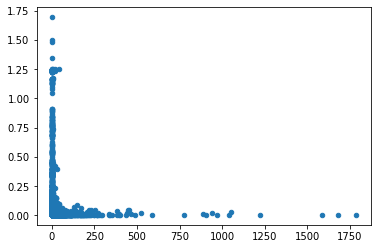

In [14]:
data = []
for key in dictData:
    tmpList = [dictData[key][3], dictData[key][2]/365]
    data.append(tmpList)

with open('data.txt', 'w') as f:
    for item in data:
        f.write("%s\n" % item)

X = np.array(data)

plt.scatter(X[:, 0], X[:, 1], s=20);

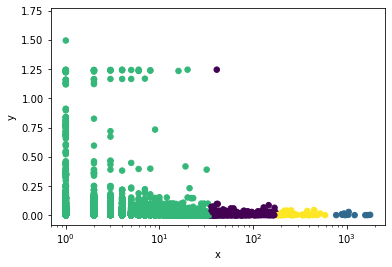

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.xscale('log',base=10)
plt.savefig('clusterRythm_lastDate.png', format='png', bbox_inches='tight')